# Step 1: 1D-linear convection equation
In this notebook we simulate the evolution of 1D-linear convection equation:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

where $u = u\left(x, t\right)$ and $c$ is the speed at which the perturbation travels (it is a constant value).

We use $\textbf{Forward Difference scheme}$ for the time derivative and the $\textbf{Backward Difference scheme}$ for space derivative. Thus:

$$\frac{\partial u}{\partial t} \simeq \frac{u\left(t + \Delta t \right) - u\left(t\right)}{\Delta t} = \frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t}$$

$$\frac{\partial u}{\partial x} \simeq \frac{u\left(x \right) - u\left(x - \Delta x\right)}{\Delta x} = \frac{u^{n}_{i} - u^{n}_{i-1}}{\Delta x}$$

Remember that these work only if we can neglect in the Taylor expansions these terms:

$$\frac{\left(\Delta x \right)^{n - 1}}{n!} \cdot \frac{\partial^n u\left(x_i, t\right)}{\partial x^n}$$

Which is true if we have that $\Delta x \rightarrow 0$ and that $\frac{\partial^n u\left(x_i, t\right)}{\partial x^n}$ is not blowing up.

The time evolution of $\textbf{u}$ will be then calculated as:

$$u^{n+1}_{i} = u^{n}_i - c \frac{\Delta t}{\Delta x} \left(u^{n}_i - u^{n}_{i-1} \right)$$

Issues with the code stability:
- the number of the spatial grid's points affects somehow code performance and changes the shape of the wave. Dunno why!
- nt = 40 and c = 0.5 does not produce the same result as dt = 20 and c = 1. In the first case we again have shape changing, while there's no issue in the second case.
- when $c > 1$, simulation experiences instability. When $0 < c \leq 1$, the wave shape changes. When $c < 0$, the code is unstable again.

Page references: 

- https://drzgan.github.io/Python_CFD/2.1D%20linear%20convection.html
- https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/01_Step_1.ipynb
- https://youtube.com/playlist?list=PL30F4C5ABCE62CB61&si=wybjA0W0KIiFBn5l
- Prof. Barba's course in Boston University (e-learning): https://piazza.com/bu/spring2013/me702/resources

In [5]:
# Let's start by loading some modules
import numpy as np
from matplotlib import pyplot as plt
import time, sys
import scipy.constants as cst

In [68]:
# Spatial grid of nx points in the (0, 2) range spaced by dx distance
nx = 81
dx = 2 / (nx - 1)
print(dx)

0.025


In [76]:
nt = 20   # Number of timesteps we want to calculate
dt = 0.025   # Delta_t between consecutives timesteps
c = 1   # We assume the wave speed is equal do 1

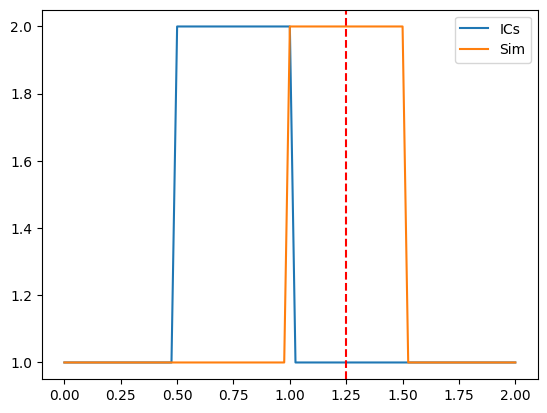

In [78]:
# Setting up initial conditions: 
# u is 2 between 0.5 and 1, u is 1 everywhere else
# int(0.5/dx) truncates the decimal part of 0.5/dx

# Square wave as Initial Conditions (ICs)
u = np.ones(nx)
u[int(0.5 / dx):int(1 / dx + 1)] = 2

# Sinusoidal wave as ICs
# assex = np.linspace(0, 2, nx)
# u = np.sin(cst.pi*assex/0.25) + 1

ICs = u.copy()

# print(u)




# Start simulation
un = np.ones(nx)   # temporary array for storing u(x, t+dt)

for n in range(nt):
    un = u.copy()   # Creates a copy of u
    for i in range(1, nx):
        u[i] = un[i] - c * dt/dx * (un[i] - un[i-1])
    # plt.plot(np.linspace(0,2, nx), ICs, label = 'ICs')
    # plt.plot(np.linspace(0,2, nx), u, label = 'Sim')
    # plt.show()

# N.B.: doing un = u, instead of un = u.copy(), creates a reference un of u.
# Thus every change made in u will be visible also in un, that's we use np.copy().

# N.B.: in the space cycling we skip the first point.
# That's because, using a backward difference scheme for spatial derivative, time
# evolution of u[0] is an ill-posed problem as un[i-1] does not make sense!

## Show the ICs against the resultant evolution
plt.plot(np.linspace(0,2, nx), ICs, label = 'ICs')
plt.plot(np.linspace(0,2, nx), u, label = 'Sim')
plt.axvline(1.25, color='r', linestyle='--')
plt.legend()

# N.B.: ICs do not have straight sides because of the finite discretization.
# If you set a large nx (i.e. small dx), the sides will appear straight.

In [3]:
from IPython.display import YouTubeVideo
# YouTubeVideo('aak3XNAuucU?si=SU48q6nVlImAo4qn')
# YouTubeVideo('1E506yyAyXE?si=QPnVfVMEPBLhKvp3')   # Lesson 2
YouTubeVideo('4U0yb69jM98?si=dZ_vKsTA_z50f8-n')   # Lesson 3
# YouTubeVideo('uGLsg_eC19I?si=_NeLZF37fwhXD4I6')   # Lesson 4

In [464]:
from IPython.display import YouTubeVideo
YouTubeVideo('tOKS5oSqjII?si=2-qwILYAeZa0wNyW')

# Step 2: Nonlinear convection and 'upwind scheme'

In this notebook we try to implement a nonlinear convection:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

where $u = u\left(x, t\right)$.

We start by using the forward difference scheme for time derivative and backward difference scheme for space derivative. Next we implement the $\textbf{Upwind difference scheme}$ (also called as the $\textbf{Advection scheme}$) for the space derivative, in order to be able to simulate also when the speed of advection is negative.

The size of the time steps will be defined via the CFL factor as:

$$dt = \frac{CFL \cdot dx}{u\left(x_{MAX}, 0\right)}$$

What we observe is that the hat function moves and changes its shape, irregardless of the speed direction (i.e. its sign). In particular, it shrinks and it forms a sort of a 'wake'. If I change the mesh density, the lifetime of the simulation ($nt\cdot dt$) decreases, but there are no code instabilities as in step 1. If we increase the number of time steps, the shape of the hat function is not affected more than already noted (it retains the same features: same hight, formation of a 'wake' and the shrunk width, but they're more emphasized due to a longer lifetime of the simulation).

Observed instabilities:

- when we use the backward scheme for space differentiation, the code breaks up if the advection velocity is negative (i.e. $u \left(x, 0\right) < 0 \;\;\forall x$)
- the code is stable only when $0 \leq CFL \leq 1$

Page references:

- https://drzgan.github.io/Python_CFD/3.Nonlinear%20convection.html
- https://en.wikipedia.org/wiki/Upwind_differencing_scheme_for_convection
- https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/02_Step_2.ipynb

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [350]:
# Setting up the space and time grids:
## nx is the number of mesh points
## dx is the distance between adjacent mesh points
nx = 361
dx = 2 / (nx - 1)

nt = 50
# dt = 0.025

In [362]:
# Setting up initial conditions: 
# u is 2 between 0.5 and 1, u is 1 everywhere else
# int(0.5/dx) truncates the decimal part of 0.5/dx

# Square wave as Initial Conditions (ICs)
u = np.ones(nx)
# u[:] = -1
u[ int(0.5 / dx) : int(1 / dx + 1) ] = 2
ICs = np.copy(u)

CFL = 0.9
dt = CFL * dx / max(abs(u))
un = np.ones(nx)   # Initialization of our placeholder array, to store time-stepped solution

# plt.plot(np.linspace(0,2, nx), u)
# plt.plot(np.linspace(0,2, nx), un)

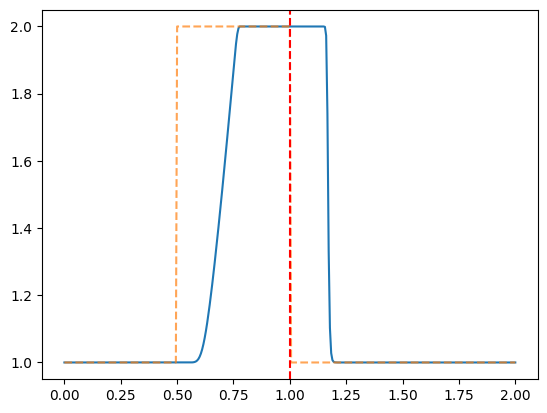

In [364]:
for n in range(nt):   # time iteration
    un = u.copy()

    F = lambda c: (max(c/abs(c) , 0), max(-c/abs(c) , 0))
    # F = lambda c: (max( c/(abs(c) + 1e-6) , 0), max( -c/(abs(c) + 1e-6), 0))
    
    for i in range(1, nx - 1):   # space iteration: first and last points are kept fixed

        ## Implementation of the upwind scheme
        fe1, fe2 = F(u[i])
        fw1, fw2 = F(u[i])

        ue = fe1 * un[i] + fe2 * un[i+1]   # With positive speed: backward scheme (fe2, fw2 = 0)
        uw = fw1 * un[i-1] + fw2 * un[i]   # With negative speed: forward scheme (fe1, fw1 = 0)

        u[i] = un[i] - un[i] * (dt/dx) * (ue - uw)
        
        ## Implementation with backward space differentiation
        # u[i] = un[i] - un[i] * (dt/dx) * (un[i] - un[i-1])
    
plt.plot(np.linspace(0, 2, nx), u)
plt.plot(np.linspace(0,2, nx), ICs, '--', alpha=0.7)
# plt.axvline(0.75, linestyle='--', color='r')
plt.axvline(0.75+nt*dt*2, linestyle='--', color='r')
plt.show()

# dx = u.copy()
# sx = u.copy()

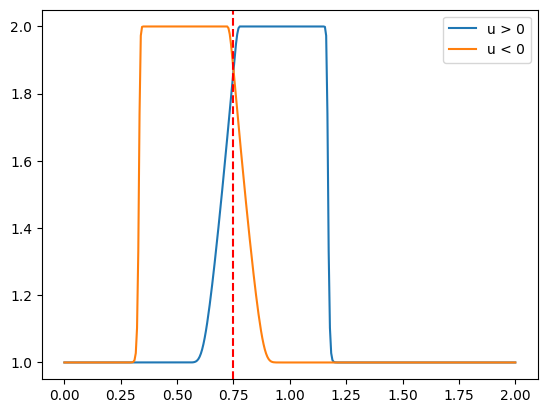

In [374]:
## Both evolutions with u < 0 and u > 0 are 'the same'

plt.plot(np.linspace(0, 2, nx), dx, label='u > 0')
plt.plot(np.linspace(0, 2, nx), -sx, label='u < 0')
plt.axvline(0.75, linestyle='--', color='r')
plt.legend()

# Step 3: Convergence and the CFL condition

Here we solve the issues encountered in the previous steps regarding the code stability and the mesh size. Let's first define the Courant's number as following: $$CFL = \frac{c\cdot dt}{dx}$$

where $c$ is the wave speed, $dt$ the size of a time step and $dx$ the distance between two mesh points. 

Experimenting with the code in "Step 2" we've noticed that the implementation is stable when $0 \leq CFL \leq 1$. 
- when $CFL > 1$, the code is calculating the wave value at point i using information from the point i+1 or i-1, but the time step is larger than the time the information needs to travel from i+1 or i-1 via the advection. Saying it differently: in $dt$ time, the wave travels more than it $\textit{should}$ be. This kind of limitation obviously depends on the size and spacing of the mesh.
- when $CFL < 0$, the code is just not "time reverse proof".

Regardless of code stability, I do not like the $\textbf{numerical diffusion}$ caused when $CFL \neq 1$. Sincerely, I still don't know why it happens, but it's related to the distance $dx$, the speed $c$ and the time $dt$ for sure.

In the next lines I write a code which implements the Courant's condition with the upwind scheme used in 'Step 2', in order to accomodate a wave travelling in the left direction with a constant speed $c$ and a variable number of mesh points. Remember that when $nx$ increases $dt$ decreases, so the total time of evolution reduces because $nt$ is hold fixed.

Page references:
- https://drzgan.github.io/Python_CFD/4.%20CFL%20condition.html
- https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/03_CFL_Condition.ipynb

In [161]:
import numpy as np
from matplotlib import pyplot as plt

F = lambda c: (max( c/abs(c), 0), max( -c/abs(c), 0))

def linear_advection (nx, nt = 20, c = 1, CFL = 0.9):
    dx = 2 / (nx - 1)
    dt = CFL*dx / abs(c)

    ICs = np.ones(nx)
    ICs[:] =  -1
    ICs[ int(0.5/dx) : int(1/dx + 1) ] = -2
    u = ICs.copy()
    un = np.zeros(nx)

    for n in range(nt):
        un = u.copy()
        for i in range(1, nx - 1):
            ## Upwind scheme
            fe1, fe2 = F(c)
            fw1, fw2 = F(c)
            ue = fe1 * un[i] + fe2 * un[i+1]
            uw = fw1 * un[i-1] + fw2 * un[i]
            u[i] = un[i] - c * dt/dx * (ue - uw)
            ## Backward scheme
            # u[i] = un[i] - c * dt/dx * (un[i] - un[i-1])

    print("Time step: dt = ", dt)
    print("Total time of simulation: T = ", dt*nt)
    print("Courant number: CFL = ", CFL)
    plt.plot(np.linspace(0, 2, nx), u, label = 'u')
    plt.plot(np.linspace(0, 2, nx), ICs, label = 'ICs')
    plt.legend()
    plt.show()

Time step: dt =  0.025
Total time of simulation: T =  0.25
Courant number: CFL =  1


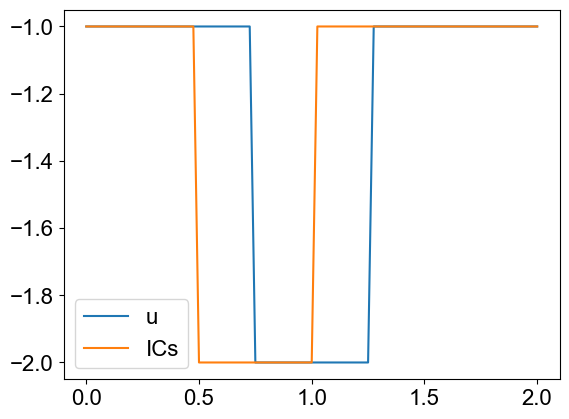

In [189]:
linear_advection(81, 10, 1, 1)

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('PrbiBDILjo4?si=o3Hb3npaX8c8TAC5')   # Lesson 9

# Step 4: Diffusion equation in 1-D

Let us now focus on the 1-D version of the $\textbf{Diffusion equation}$, which is a second-order partial differential equation. For a given function $u\left(x, t\right)$ is states: $$\frac{\partial u}{\partial t} = \nu\; \frac{\partial^2 u}{\partial x^2}$$

To discretize a second derivative, we adopt the $\textbf{Central Difference scheme}$:

$$u_{i + 1} = u_i + \frac{\partial u}{\partial x}|_i\; \Delta x + \frac{1}{2!}\frac{\partial^2 u}{\partial x^2}|_i\; \Delta x^2 + \frac{1}{3!}\frac{\partial^3 u}{\partial x^3}|_i\; \Delta x^3 + O \left(\Delta x^4\right)$$

$$u_{i - 1} = u_i - \frac{\partial u}{\partial x}|_i\; \Delta x + \frac{1}{2!}\frac{\partial^2 u}{\partial x^2}|_i\; \Delta x^2 - \frac{1}{3!}\frac{\partial^3 u}{\partial x^3}|_i\; \Delta x^3 + O \left(\Delta x^4\right)$$

$$\Rightarrow u_{i + 1} + u_{i - 1} = 2u_i + \frac{\partial^2 u}{\partial x^2}|_i\; \Delta x^2 + O \left(\Delta x^4\right)$$

$$\Rightarrow \frac{\partial^2 u}{\partial x^2}|_i = \frac{u_{i + 1}\; -\;  2u_i\; +\; u_{i - 1}}{\Delta x^2} + O \left(\Delta x^2\right)$$

Remember that this approximation works only when $\Delta x \rightarrow 0$ and when the higher order derivatives (fourth, sixth ecc.) are also of negligible intensity.

Then, adopting the $\textbf{Forward Difference scheme}$ for the time derivative as we did with the advection (convection) equation, we obtain that: $$\frac{u_i^{n + 1} - u_i^{n}}{\Delta t} \simeq \nu\; \frac{u_{i + 1}^n\; -\;  2u_i^n\; +\; u_{i - 1}^n}{\Delta x^2}$$

From which, finally: $$u_i^{n + 1} \simeq u_i^{n} + \frac{\nu \Delta t}{\Delta x^2}\left(u_{i + 1}^n\; -\;  2u_i^n\; +\; u_{i - 1}^n\right)$$

Observed features:

- the increase of mesh points and of timesteps, while keeping a constant $\textbf{total time}$ of evolution ($T = nt * dt$), leads to the same, but smoother, diffusion of the step function.

Page references:

- https://drzgan.github.io/Python_CFD/5.%201D%20diffusion%20equation.html
- http://nbviewer.jupyter.org/github/barbagroup/CFDPython/blob/master/lessons/04_Step_3.ipynb

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
import ipywidgets
%matplotlib inline

Time step:  1.6666666666666667e-05
Total time of simulation:  0.03333333333333333


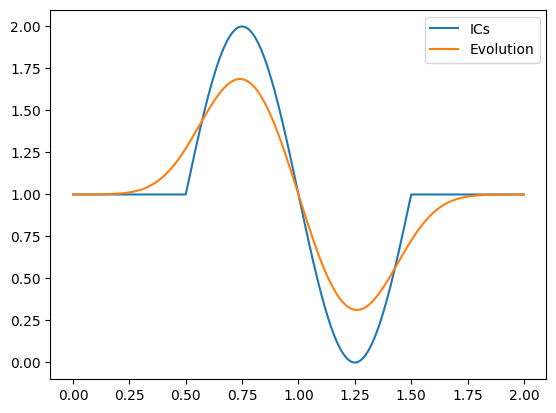

In [80]:
nx = 401   # Number of mesh points
dx = 2 / (nx - 1)   # Distance between mesh points
nt = 2000   # Number of timesteps
nu = 0.3   # Diffusione coefficient: the viscosity for a fluid model
sigma = 0.2
dt = sigma * dx**2 / nu   # [nu] = L**2 / T

print("Time step: ", dt)
print("Total time of simulation: ", nt*dt)

ICs = np.ones(nx)   # Initial conditions
# ICs[int(0.5/dx) : int(1/dx + 1)] = 2
F = lambda c : np.sin(np.pi*(c - 0.5)/0.5) + 1
ICs[int(0.5/dx) : int(1.5/dx + 1)] = F(np.linspace(0.5, 1.5, 201))

u = ICs.copy()
un = np.zeros(nx)   # Placeholder for n-1 timestamp

for n in range(nt):
    un = u.copy()
    print(n, end = '\r')   # Update simulation status
    for i in range(1, nx-1):   # From the second point to the second to last point
        u[i] = un[i] + (nu*dt/dx**2) * (un[i+1] - 2*un[i] + un[i-1])
# temp = u.copy()

plt.plot(np.linspace(0, 2, nx), ICs, label = 'ICs')
plt.plot(np.linspace(0, 2, nx), u, label = 'Evolution')
# plt.plot(np.linspace(0, 2, 41), temp, label = 'lll')
plt.legend()
plt.show()

## Animazione

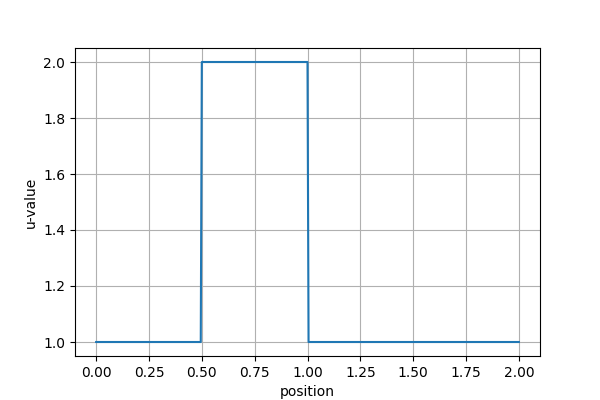

In [19]:
%matplotlib widget

## Set the parameters of the animation:
# jump: width of the time interval over which calculate the Fourier transform
# nr_frames: nr=umber of frames in the video
# fps: frames per second of the video
# Ecut: E field oscillations in 'pos' from time 0 to jump (first frame)
# N: number of points of Ecut, to pass to ffrfreq
# F: Fourier transform of Ecut

nx = 401   # Number of mesh points
dx = 2 / (nx - 1)   # Distance between mesh points
nt = 200   # Number of timesteps
nu = 0.3   # Diffusione coefficient: the viscosity in our fluid case!
sigma = 0.2
dt = sigma * dx**2 / nu

ICs = np.ones(nx)   # Initial conditions
ICs[int(0.5/dx) : int(1/dx + 1)] = 2
# F = lambda c : c
# ICs = F(np.linspace(0, 2, nx))

u = ICs.copy()
un = np.zeros(nx)   # Placeholder for n-1 timestamp

fig, ax = plt.subplots(figsize = (6, 4))
line = ax.plot(np.linspace(0, 2, nx), u)[0]
ax.set(ylabel = 'u-value', xlabel = 'position')
ax.grid()

# nr_frames = int((n_iter - 1)/jump)
nr_frames = nt
fps = 64

## Create the animation:
# skip: calculate the suitable index for the xth frame of the Et array,
# where n_iter is the total number of iterations
# skip = lambda x: int(x*n_iter / nr_frames)

def update(frame):
    ## For each frame, update the data stored on each artist:
    # we select the suitable interval of Et from skip(frame) to skip(frame) + jump.
    # That works because the distance between two consecutive frames is jump
    
    un = u.copy()
    for i in range(1, nx-1):   # From the second point to the second to last point
        u[i] = un[i] + (nu*dt/dx**2) * (un[i+1] - 2*un[i] + un[i-1])
    
    x = np.linspace(0, 2, nx)
    y = u.copy()
    
    ## Update the line plot:
    line.set_xdata(x)
    line.set_ydata(y)
    # ax.set_ylim(0, 1.1*np.max(y))
    # iteration = int(n_iter*frame/nr_frames)
    # ax.set_title("Fourier space time evolution\nframe = {}/{}\niteration = {:n}/{}".format(frame, nr_frames, iteration, n_iter))
    return (line)

ani = animation.FuncAnimation(fig = fig, func = update, frames = nr_frames, interval = 1000./fps, repeat = False)
# ani.save(filename = "diffusion.gif", writer="pillow")
plt.show()
%matplotlib inline

# Step 5: Burgers' equation in 1-D

Now let's put together the 1D non-linear convection equation with the diffusion one:

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}\;\;\;\;\left(1\right)$$

which is called the Burgers'-Bateman 1D equation. 

As already done, we use the $\textbf{Forward difference scheme}$ for time derivative and the $\textbf{Backward}$ and $\textbf{Central difference schemes}$ respectively for 1st and 2nd space derivatives, to obtain:

$$u_i^{n+1} \simeq u_i^n - u_i^n \frac{\Delta t}{\Delta x}\left(u_i^n - u_{i-1}^n\right) + \nu \frac{\Delta t}{\Delta x^2} \left(u_{i+1}^n - 2u_i^n + u_{i-1}^n\right)$$




In the previous notebook, where we discussed the diffusion equation, we used this definition for our timestep:

$$dt = \sigma_{CFL} \cdot \frac{dx^2}{\nu}$$

where $\sigma_{CFL} = 0.2$ is the Courant number and $\nu$ is the kinematic viscosity, for which 
 $\left[\nu\right] = L^2\; T$. And we've used non-periodic fixed boundary conditions with a hat-function as initial condition.

This time we'll use a periodic boundary condition and a saw-tooth function as initial condition for our system. The box size will be no longer $\left[0, 2\right]$ but $\left[0, 2\pi\right]$ instead, therefore the BCs are simply: $$u\left(0\right) = u\left(2\pi\right)\;\;\;\;\left(2\right)$$

The ICs are:

$$u\left(x, 0\right) = - \frac{2\nu}{\phi} \frac{\partial \phi}{\partial x} + 4\;\;\;\;\left(3a\right)$$ where $$\phi\left(x, 0\right) = exp\left(-\frac{x^2}{4\nu}\right) + exp\left(- \frac{\left(x - 2\pi\right)^2}{4\nu}\right)\;\;\;\;\left(3b\right)$$

Because an analytical solution of $\left(1\right)$, given $\left(2\right)$ and $\left(3\right)$, is $u\left(x, t\right) = - \frac{2\nu}{\phi} \frac{\partial \phi}{\partial x} + 4$ with: $$\phi \left(x, t\right) = exp\left(-\frac{\left(x - 4t\right)^2}{4\nu\left(t + 1\right)}\right) + exp\left(- \frac{\left(x - 4t - 2\pi\right)^2}{4\nu\left(t + 1\right)}\right)$$

The time step will be again computed as $dt = \sigma_{CFL} \cdot \frac{dx^2}{\nu}$, with $\sigma_{CFL} = 0.2$.





Observed instabilities:
- when $\sigma_{CFL}$ increases, the numerical solution diverges from the analytical one and the computation encounters overflow issues
- a $\sigma_{CFL}$ smaller than 0.2 seems to not increase too much the precision of the computation (i.e. 0.2 is a good compromise)

Page references:
 - https://drzgan.github.io/Python_CFD/6.%20Burgers%27%20equation.html
 - https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/05_Step_4.ipynb
 - https://en.wikipedia.org/wiki/Burgers'_equation

Symbolic math infos:
 - Numerical vs Symbolic computations: https://en.wikipedia.org/wiki/Computer_algebra
 - CAS (Computer Algebra System): https://en.wikipedia.org/wiki/Computer_algebra_system
 - Sympy documentation: https://www.sympy.org/en/

Matplotlib features:
 - Modify rc (runtime configuration) parameters during display: https://matplotlib.org/stable/users/explain/customizing.html
 - Change displayed font: https://matplotlib.org/stable/gallery/text_labels_and_annotations/font_family_rc.html
 - Figure size and dpi (dots per inch): https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size

In [234]:
# Let's start by importing some useful packages
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.utilities.lambdify import lambdify

sp.init_printing(use_latex = True)

# Initial conditions

In [236]:
# To speed up the setting of ICs, we use the Sympy package for symbolic calculations

x, nu, t = sp.symbols('x nu t')   # Set up the corrispondence with symbolic variables
phi = sp.exp( -(x - 4*t)**2 / (4*nu*(t + 1)) ) + sp.exp( -(x - 4*t - 2*sp.pi)**2 / (4*nu*(t + 1)) )
# phi

phiprime = phi.diff(x)   # Differentiate with respect to x
u = -2*nu*(phiprime / phi) + 4
# u

# If we use print(u), it shows the unrendered version of u suitable for python functions
# But we can create a function based on u by just using the lambdify function:

ufunc = lambdify((t, x, nu), u)   # Create a Python function which calculates u(t, x, nu)

In [376]:
# Set up the simulation conditions:
nx = 401
nt = 800
dx = 2*np.pi / (nx - 1)   # Simulation box: [0, 2*np.pi]
nu = 0.07

sigma = 0.2
dt = sigma * dx**2 / nu   # [nu] = L**2 / T

print("Timestep size: ", dt)
print("Total time of simulation: ", dt*nt)
print("dt/dx**2: ", dt/dx**2)

x = np.linspace(0, 2*np.pi, nx)

ICs = np.asarray(ufunc(0, x, nu))
# ICs = ufunc(t, x, nu)

Timestep size:  0.0007049717429349542
Total time of simulation:  0.5639773943479633
dt/dx**2 2.857142857142857


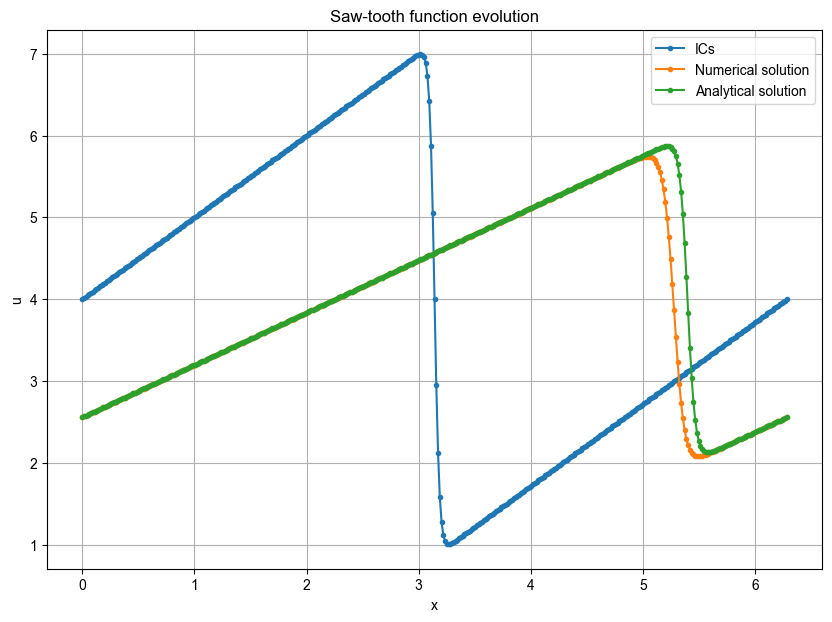

In [378]:
u = ICs.copy()
un = np.zeros(nx)
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):   # Cycle trough second to second to last point
        u[i] = un[i] - (dt/dx)*un[i]*(un[i] - un[i-1]) + (nu*dt/dx**2)*(un[i+1] - 2*un[i] + un[i-1])
    # Periodic boundary conditions:
    u[-1] = un[-1] - (dt/dx)*un[-1]*(un[-1] - un[-2]) + (nu*dt/dx**2)*(un[1] - 2*un[-1] + un[-2])
    u[0] = u[-1]

u_anal = np.asarray(ufunc(nt*dt, x, nu))   # Analytical solution

# print(u[0], u[-1])
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 10
plt.figure(figsize = (10, 7), dpi = 100)

plt.plot(x, ICs, marker = '.', label = 'ICs')
plt.plot(x, u, marker = '.', label = 'Numerical solution')
plt.plot(x, u_anal, marker = '.', label = 'Analytical solution')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Saw-tooth function evolution')
# plt.xlim(3, 4)

plt.grid()
plt.legend()
plt.show()